# **DAI-101 ASSIGNMENT-2**

NAME-Prakhar Mehta

ENROLLMENT NO-23117097

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('tips (data for regression problem).csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
#Converting categorical varibles to numerical varibles using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df.head(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


**Checking if the data follows a linear trend by plotting various plots to analyze the
relationship between the target variable and predictors. **

**SCATTER PLOT**

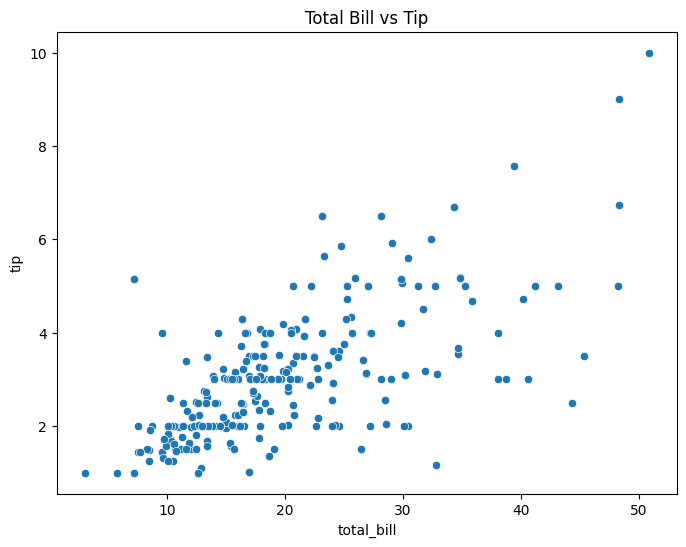

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Total Bill vs Tip")
plt.show()

**It appears that larger tips are associated with higher total bills.**

**CORRELATION MATRIX HEATMAP**

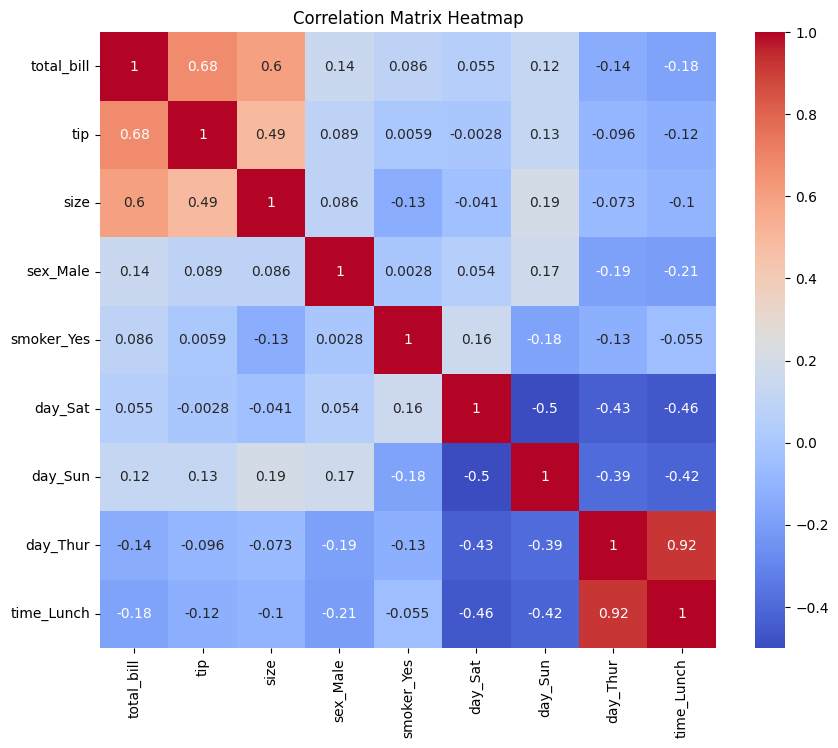

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**STASTICAL TESTS FOR LINEARITY(RAINBOW TEST)**

In [89]:
X_sm = sm.add_constant(df['total_bill'])
rainbow_statistic, rainbow_p_value = linear_rainbow(sm.OLS(df['tip'], X_sm).fit())
print(f"Rainbow test statistic: {rainbow_statistic}, p-value: {rainbow_p_value}")

Rainbow test statistic: 1.2291480226129028, p-value: 0.1291192152551375


**PAIR PLOT FOR MULTIPLE FEATURES**

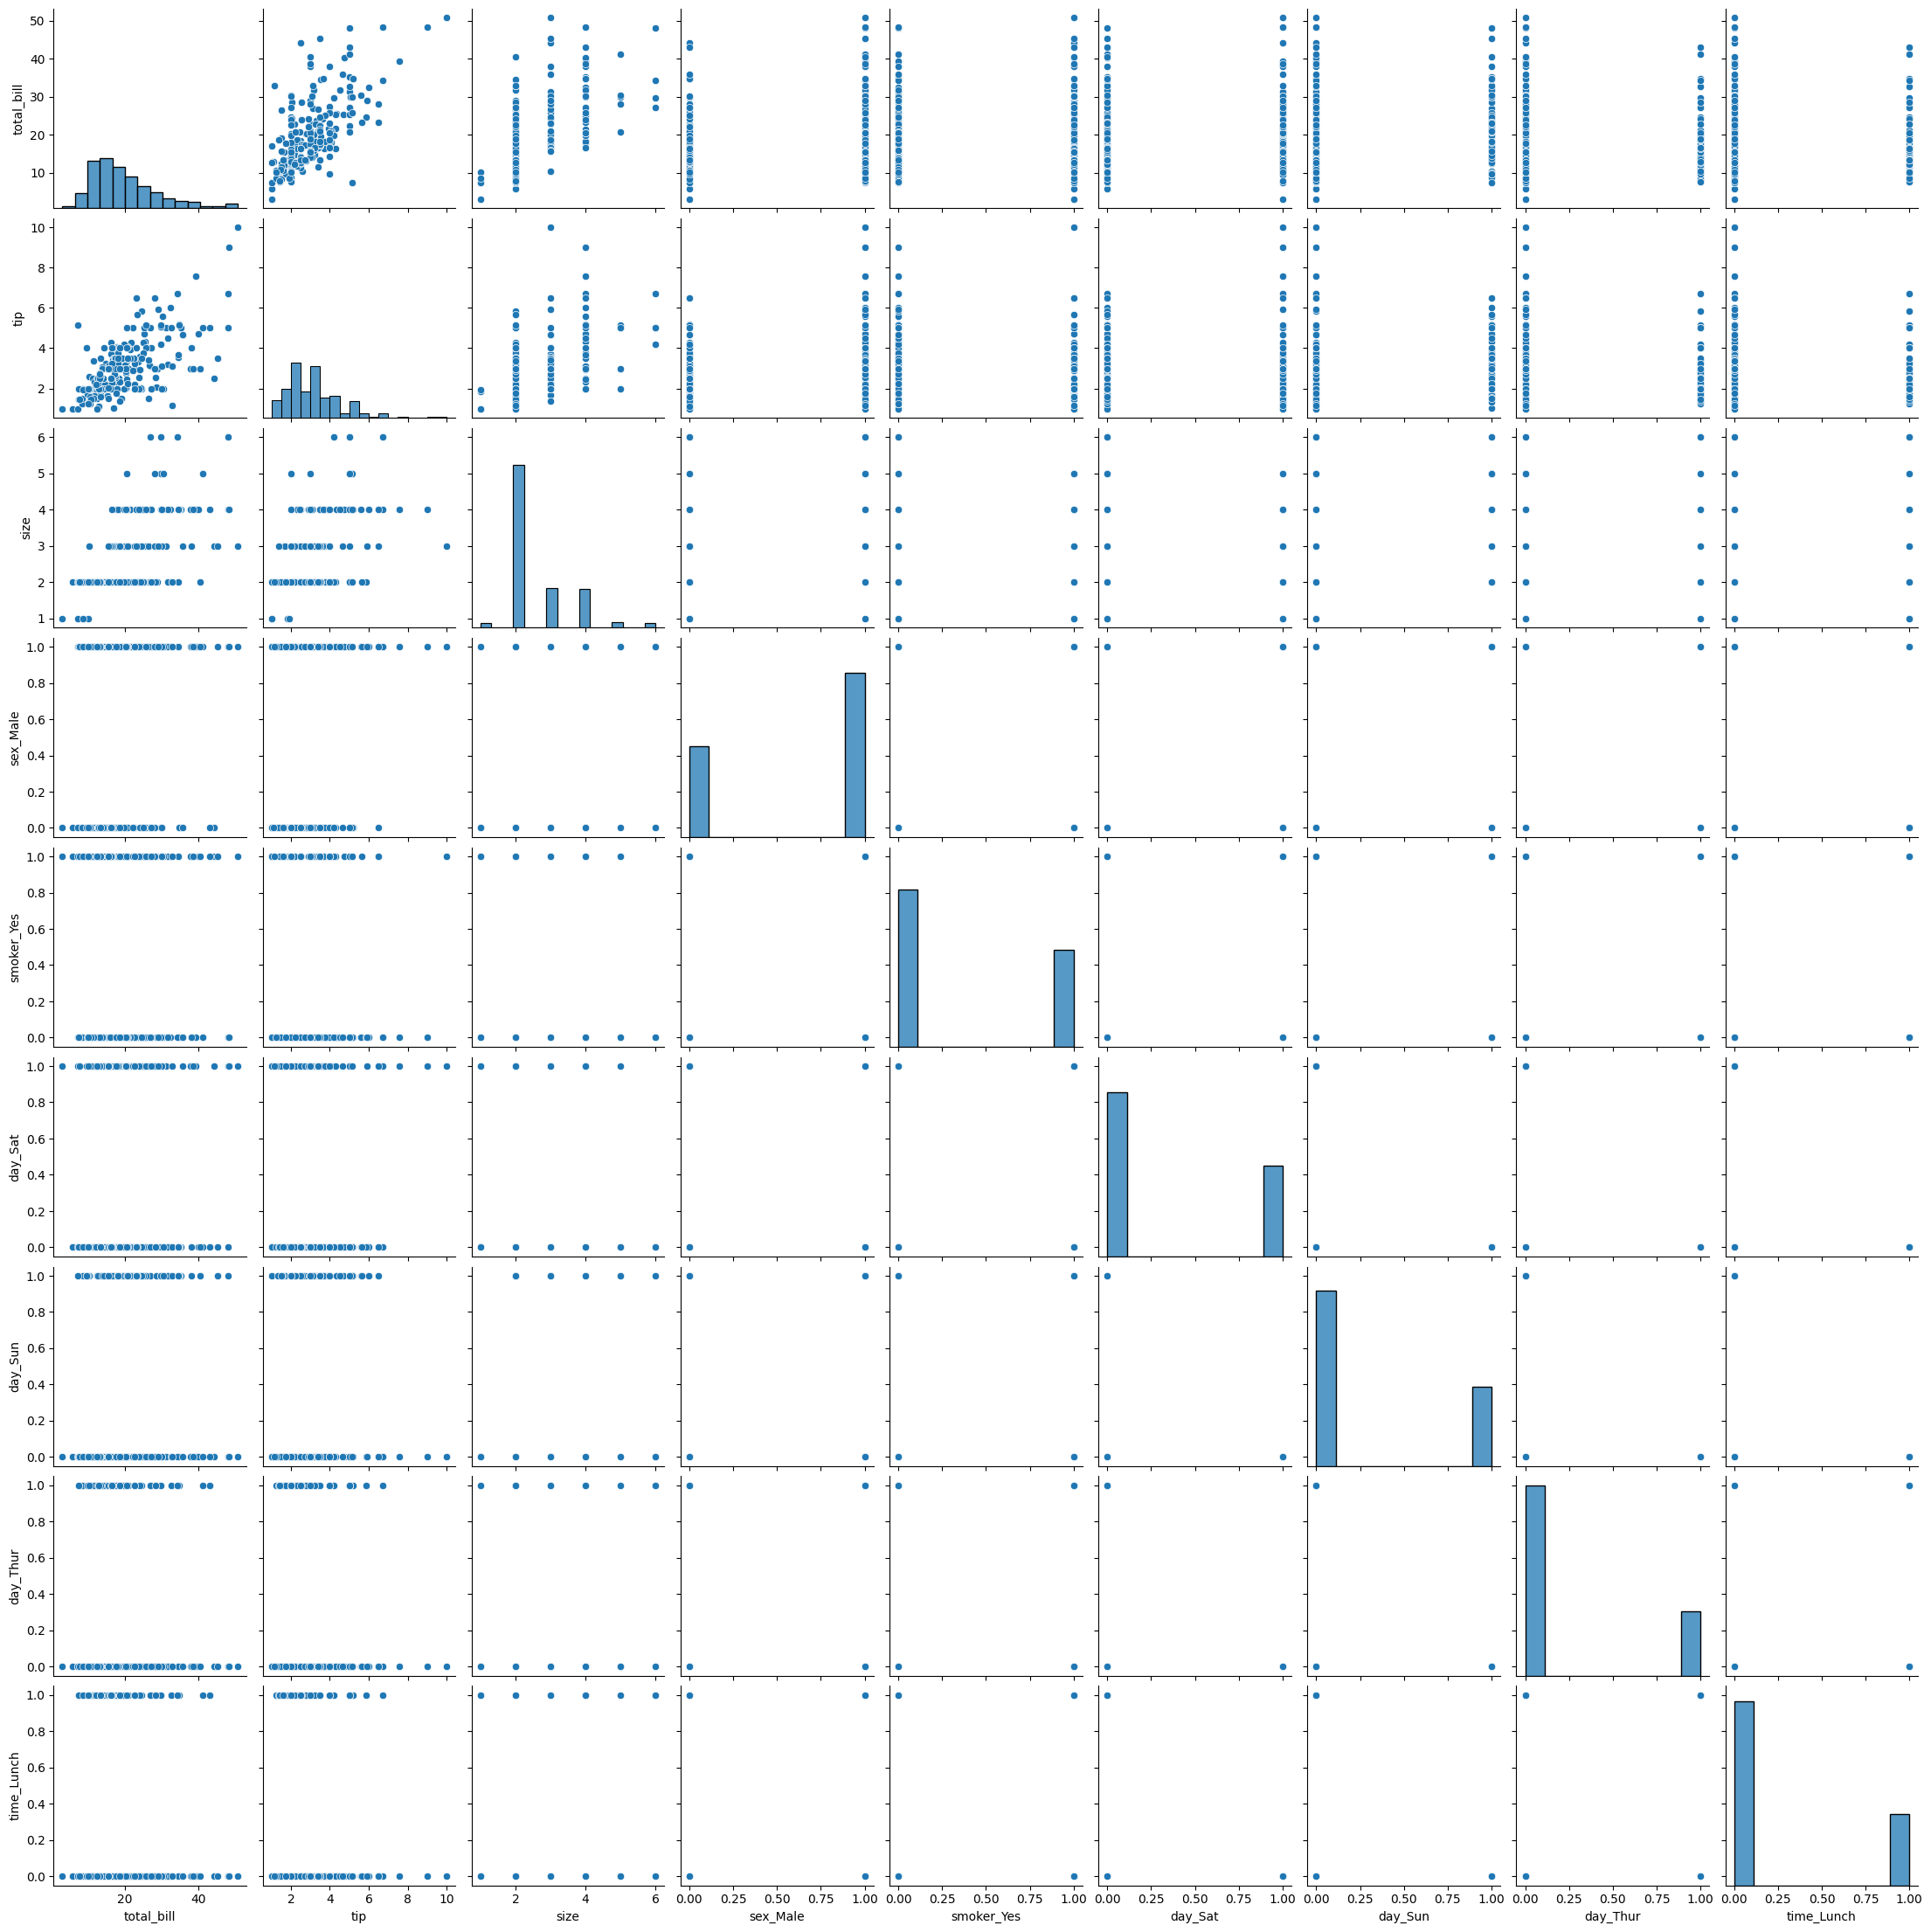

In [90]:
sns.pairplot(df)
plt.show()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("LinearRegression-MSE:", mse_linear, "R2:", r2_linear)


LinearRegression-MSE: 0.5688142529229536 R2: 0.5449381659234664


In [93]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


print("Ridge-MSE:", mse_ridge, "R2:", r2_ridge)


Ridge-MSE: 0.5688046677547027 R2: 0.5449458342338539


In [94]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("LassoRegression-MSE:", mse_lasso, "R2:", r2_lasso)

LassoRegression-MSE: 0.5672185472600116 R2: 0.5462147597181777


In [95]:
# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree-MSE:", mse_tree, "R2:", r2_tree)

Decision Tree-MSE: 1.3361979591836732 R2: -0.06898287247700985


In [96]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest-MSE:", mse_rf, "R2:", r2_rf)

Random Forest-MSE: 1.0078423115192754 R2: 0.19370766751511703


In [97]:
# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR-MSE:", mse_svr, "R2:", r2_svr)

SVR-MSE: 0.6093020747958432 R2: 0.5125471659009395


In [98]:
# K-NearestNeighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN-MSE:", mse_knn, "R2:", r2_knn)

KNN-MSE: 0.6818026938775511 R2: 0.4545453410143979


**Creating a bar plot to compare the R2 and MSE scores of different models, making it easy to visualize and compare their predictive performance.**

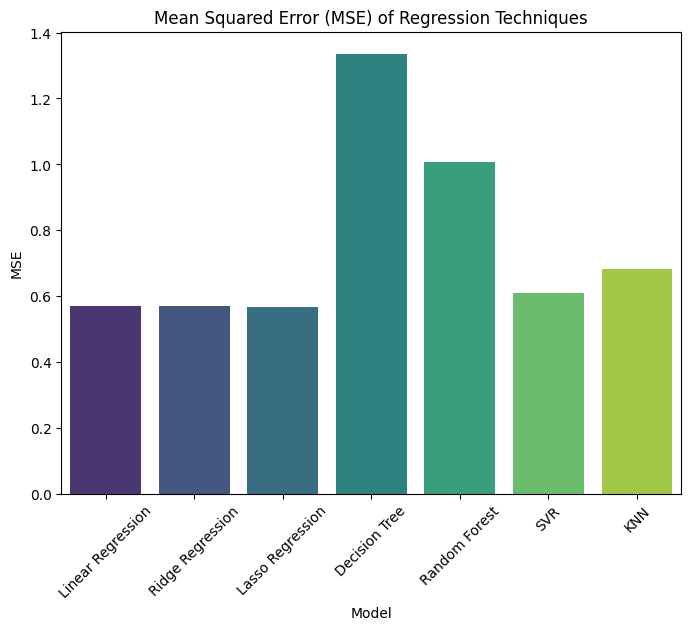

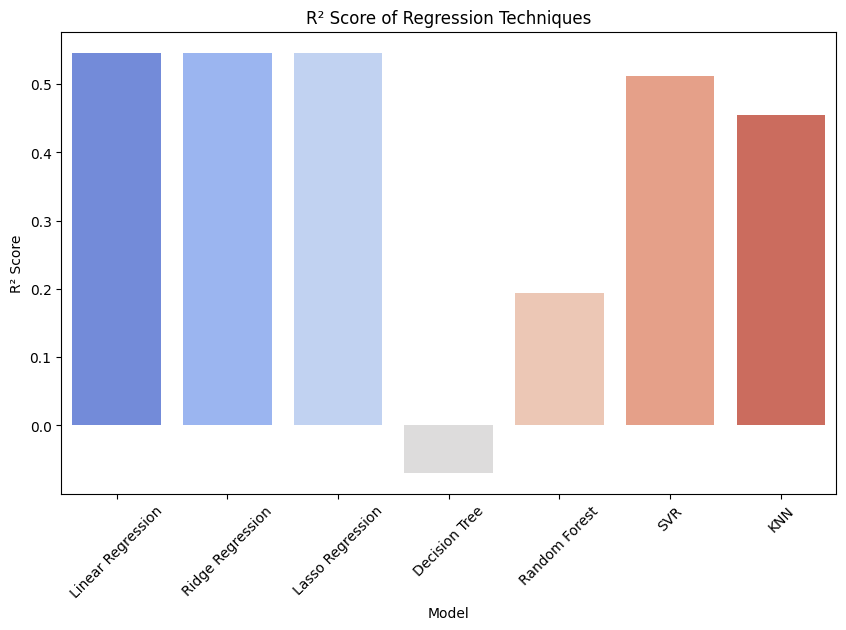

In [99]:
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression",
              "Decision Tree", "Random Forest", "SVR", "KNN"],
    "MSE": [mse_linear, mse_ridge, mse_lasso, mse_tree, mse_rf, mse_svr, mse_knn],
    "R2 Score": [r2_linear, r2_ridge, r2_lasso, r2_tree, r2_rf, r2_svr, r2_knn]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="MSE", data=results_df, palette="viridis")
plt.title("Mean Squared Error (MSE) of Regression Techniques")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2 Score", data=results_df, palette="coolwarm")
plt.title("R² Score of Regression Techniques")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()


**Best model is the one with highest R<sup>2</sup> and lowest MSE, so in this case, it is Lasso regression**

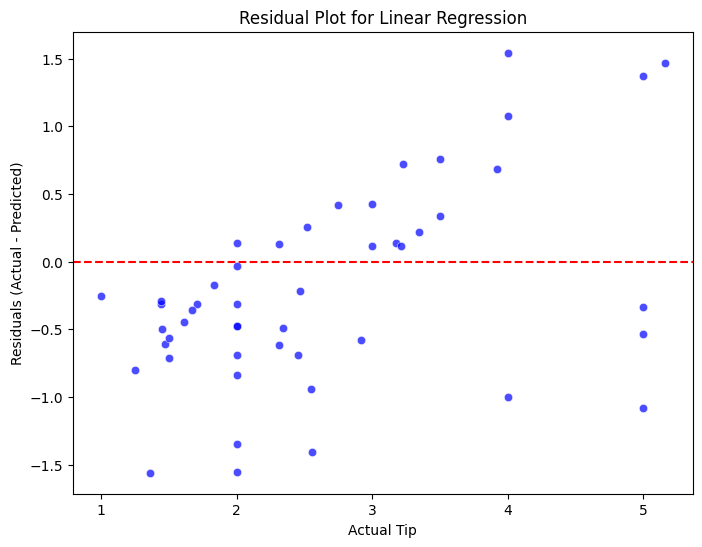

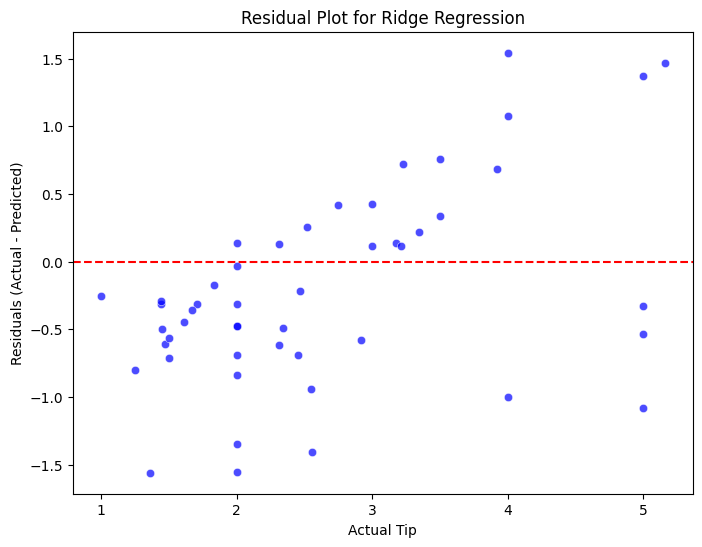

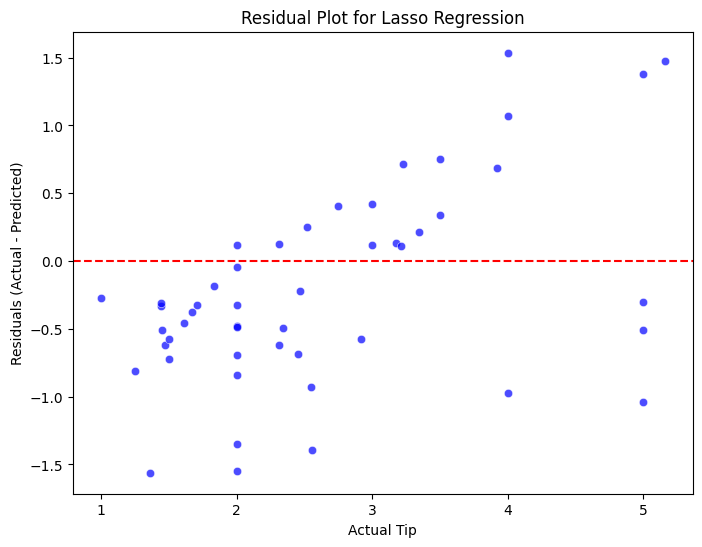

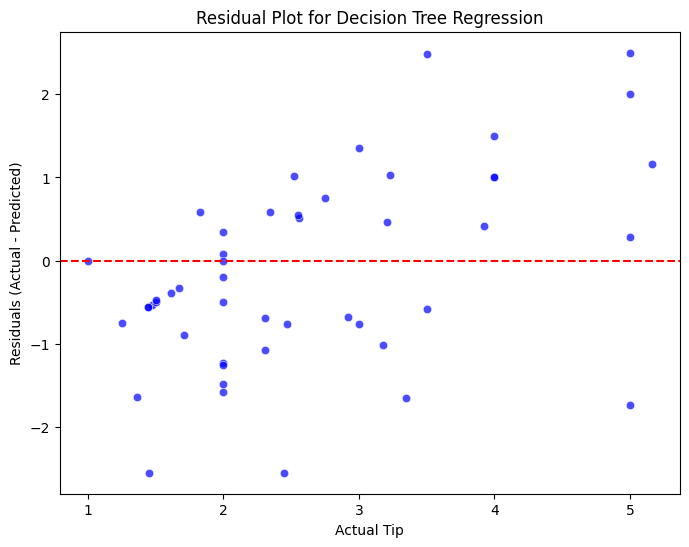

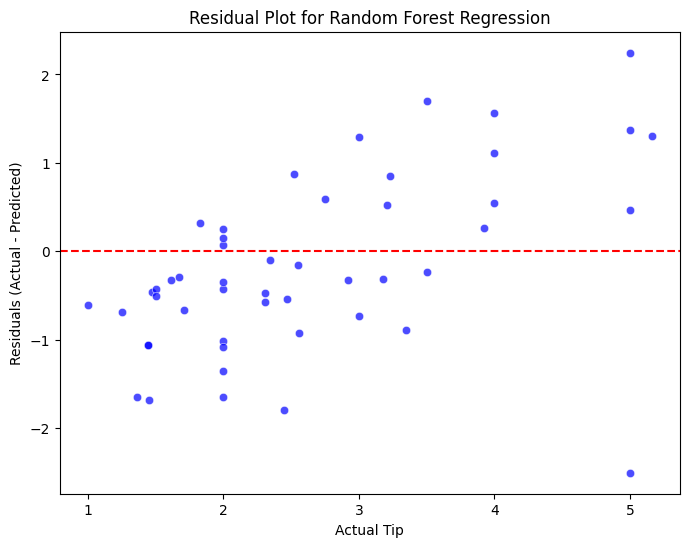

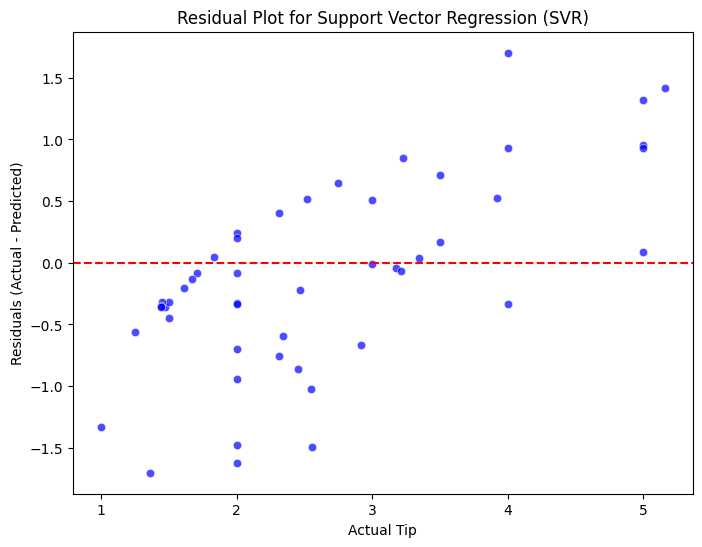

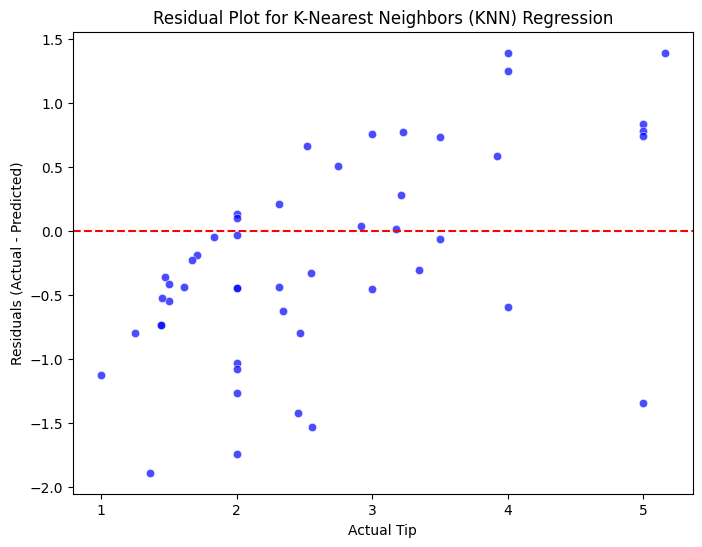

In [100]:
# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=residuals, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
    plt.title(f"Residual Plot for {model_name}")
    plt.xlabel("Actual Tip")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.show()

# Plot residuals for each regression technique
# Linear Regression
plot_residuals(y_test, y_pred_linear, "Linear Regression")

# Ridge Regression
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# Lasso Regression
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# Decision Tree
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# Random Forest
plot_residuals(y_test, y_pred_rf, "Random Forest Regression")

# Support Vector Regression
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# KNN
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors (KNN) Regression")


# **MODEL PERFORMACE**

**Linear and Ridge Regression:** Both models achieved similar results,
with the best R² (0.545) and low MSE (0.568). These are reliable methods for predicting tips.

**Lasso Regression:** Slightly better than Ridge and Linear Regression in R² (0.546), indicating it can capture more relevant features by eliminating insignificant ones.

**Decision Tree and Random Forest:** The Decision Tree model performed poorly (negative R²), suggesting overfitting or an inability to generalize. Random Forest improved slightly (R²=0.194) but was outperformed by simpler models.

**SVR and KNN:** While these non-linear models showed reasonable results, their performance (R² of 0.512 and 0.454, respectively) was inferior to linear regression-based models.

# **INSIGHTS FOR MANAGEMENT**

**Key Factors Influencing Tips:**

**Total Bill:** The strong relationship between total bill and tip amount suggests that higher bills generally lead to higher tips.

**Time:**The tip given during dinner time is significantly higher than that during lunch.

# **CONCLUSIONS**

Linear, Ridge, and Lasso Regression are the most effective techniques for predicting tips in this dataset, with R² scores of 0.54–0.55.While advanced ensemble methods like Random Forest were less effective in this scenario, simpler linear models were sufficient for capturing the key trends.



